In [1]:
from sktime.utils.load_data import load_from_tsfile_to_dataframe
from sktime.transformers.shapelets import ContractedRandomShapeletTransform

dataset = "GunPoint"
train_x, train_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/" + dataset + "/"+dataset + "_TRAIN.ts")
test_x, test_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/" + dataset + "/"+dataset + "_TEST.ts")

In [2]:
# How long (in minutes) to extract shapelets for.
# This is a simple lower-bound initially; once time is up, no further shapelets will be assessed
time_limit_in_mins = 3

# The initial number of shapelet candidates to assess per training series. If all series are visited
# and time remains on the contract then another pass of the data will occur 
initial_num_shapelets_per_case = 10

# Whether or not to print on-going information about shapelet extraction. Useful for demo/debugging
verbose = True

st = ContractedRandomShapeletTransform(
    time_limit_in_mins=time_limit_in_mins, 
    initial_num_shapelets_per_case=initial_num_shapelets_per_case, 
    verbose=verbose)
st.fit(train_x, train_y)

visiting series: 22 (#1)
Candidate finished. 2.992 minutes remaining.
Candidate finished. 2.981 minutes remaining.
Candidate finished. 2.973 minutes remaining.
Candidate finished. 2.966 minutes remaining.
Candidate finished. 2.958 minutes remaining.
Candidate finished. 2.953 minutes remaining.
Candidate finished. 2.947 minutes remaining.
Candidate finished. 2.943 minutes remaining.
Candidate finished. 2.934 minutes remaining.
Candidate finished. 2.919 minutes remaining.
visiting series: 31 (#2)
Candidate finished. 2.914 minutes remaining.
Candidate finished. 2.911 minutes remaining.
....
Candidate finished. 0.028 minutes remaining.
visiting series: 23 (#62)
Candidate finished. 0.024 minutes remaining.
Candidate finished. 0.018 minutes remaining.
Candidate finished. 0.013 minutes remaining.
Candidate finished. 0.008 minutes remaining.
Candidate finished. 0.003 minutes remaining.
time to stop! It's been 3.002 minutes


79 shapelets were extracted in 3 minutes.
The 5 shapelets with the highest information gain are shown below with their originating series.

#1: series id: 4, start_pos: 91, length: 42, info_gain: 0.7566014768892673


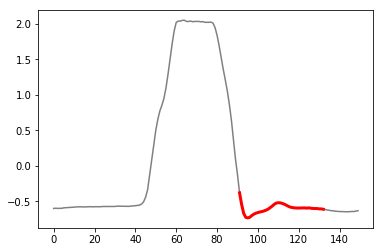

#2: series id: 13, start_pos: 8, length: 36, info_gain: 0.7205429622978472


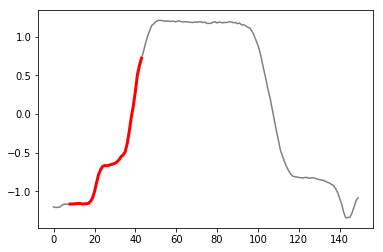

#3: series id: 22, start_pos: 21, length: 22, info_gain: 0.674445792128476


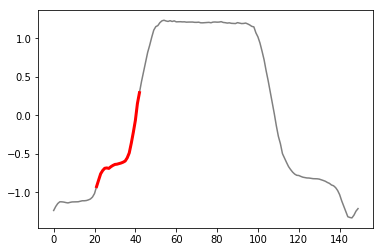

#4: series id: 22, start_pos: 105, length: 45, info_gain: 0.674445792128476


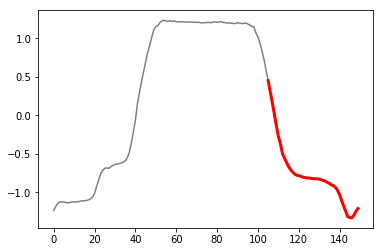

#5: series id: 27, start_pos: 8, length: 48, info_gain: 0.6589398320634585


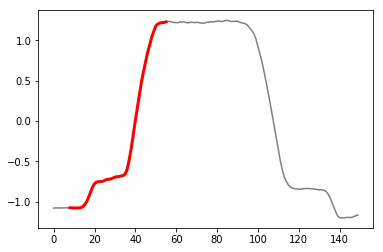

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

print(str(len(st.shapelets))+" shapelets were extracted in "+str(time_limit_in_mins)+" minutes.")
print("The 5 shapelets with the highest information gain are shown below with their originating series.\n")

# for each extracted shapelet (in descending order of quality/information gain)
for i in range(0,5):
    s = st.shapelets[i]
    # summary info about the shapelet 
    print("#"+str(i+1)+": "+str(s))
    
    # plot the series that the shapelet was extracted from 
    plt.plot(
        train_x.iloc[s.series_id,0],
        'gray'
    )
    
    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )

    plt.show()


#1: series id: 4, start_pos: 91, length: 42, info_gain: 0.7566014768892673
#2: series id: 13, start_pos: 8, length: 36, info_gain: 0.7205429622978472
#3: series id: 22, start_pos: 21, length: 22, info_gain: 0.674445792128476
#4: series id: 22, start_pos: 105, length: 45, info_gain: 0.674445792128476
#5: series id: 27, start_pos: 8, length: 48, info_gain: 0.6589398320634585


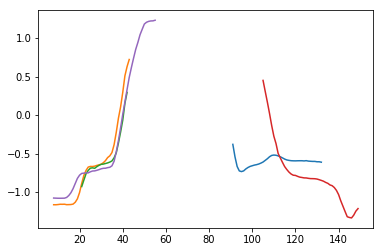

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# for each extracted shapelet (in descending order of quality/information gain)
for i in range(0,5):
    s = st.shapelets[i]
    # summary info about the shapelet 
    print("#"+str(i+1)+": "+str(s))
    
    # overlay shapelets
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length]
    )

plt.show()


In [6]:
import time
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np 

np.random.seed(0)

# example pipleine with 1 minute time limit
pipeline = Pipeline([
    ('st', ContractedRandomShapeletTransform(time_limit_in_mins=1, initial_num_shapelets_per_case=10, verbose=False)),
    ('rf', RandomForestClassifier()),
])

start = time.time()
pipeline.fit(train_x, train_y)
end_build = time.time()
preds = pipeline.predict(test_x)
end_test = time.time()

print("Results:")
print("Correct:")
correct = sum(preds == test_y)
print("\t"+str(correct)+"/"+str(len(test_y)))
print("\t"+str(correct/len(test_y))+"%")
print("\nTiming:")
print("\tTo build:   "+str(end_build-start)+" secs")
print("\tTo predict: "+str(end_test-end_build)+" secs")

C:\Users\jason\Anaconda3\envs\sktime\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Results:
Correct:
	148/150
	0.9866666666666667%

Timing:
	To build:   70.91499066352844 secs
	To predict: 32.359952211380005 secs
